# ===============================================
# 💹The "Market-Mind" Swarm
# ===============================================
**An Autonomous Analyst Swarm for Real-Time Event & Anomaly Detection**

**This notebook builds an autonomous team of AI agents to monitor a financial asset. It establishes a "baseline" of normal activity and then enters a long-running loop to detect and alert on anomalies in price, news, and social sentiment.**

# **⭐How It Works**
### 1. 🚀 Startup (Cell 7)
* You run **Cell 7**, which calls the main function: `run_market_mind_swarm("TSLA", 4, 5)`.
* This main function first **clears the old alert file** (`market_alerts.txt`) and **clears the `MEMORY_BANK`** to start fresh.

### 2. 🧐 Planning (Sequential Agent)
* The main function's first job is to call the **`PlannerAgent`**.
* The `PlannerAgent` checks if "TSLA" is a valid ticker by calling the `tool_alpha_vantage_api`.
* It gets a good response, so it gives the "OK" to continue.

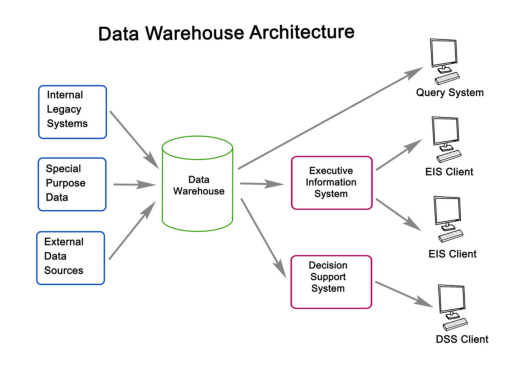

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/kaggle/input/data-warehouse-architecture/licensed-image.jpeg" 

try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  
    plt.show()
    
except FileNotFoundError:
    print(f"Error: Image not found at path: {image_path}")
    print("Please double-check the path in the 'Input' section on the right.")
except IsADirectoryError:
     print(f"Error: The path {image_path} is a folder.")
     print("You need to add the image filename (like /my_image.png) to the end of the path.")

### 3. 🔄 Loop 1: Establishing the "Baseline"
The system now enters its main loop. The first loop is special because it's just gathering the *starting* information.

* **Parallel Agents Run:** The main loop calls the three parallel agents all at once:
    * `QuantAgent` fetches a (random) price: e.g., **$150.00**.
    * `NewsAnalystAgent` fetches (random) news: e.g., "**Analysts are neutral**".
    * `SocialSentimentalistAgent` fetches (random) sentiment: e.g., "**Positive**".
* **Memory (Write):** All this data is combined into one big report. The **`HistorianAgent`** takes this report, labels it **"v1"**, and saves it to the `MEMORY_BANK`.
* **Evaluation (Read):** The **`CriticAgent`** (the "brain") runs. It looks in the `MEMORY_BANK` for a *previous* report. It finds none (this is the first one!), so it does nothing.
* **Pause:** The main loop **pauses** for 5 seconds (`time.sleep(5)`). This simulates a "long-running" agent that waits for new market data.

### 4. 🔄 Loop 2: Finding a "Delta" (Change)
* **Resume:** The system wakes up after 5 seconds.
* **Parallel Agents Run Again:** They fetch *new* random data:
    * `QuantAgent` price: e.g., **$151.00** (no big change).
    * `NewsAnalystAgent` news: e.g., "**Analysts are neutral**" (no change).
    * `SocialSentimentalistAgent` sentiment: e.g., "**Negative**" (a big change!).
* **Memory (Write):** The `HistorianAgent` saves this new report as **"v2"** in the `MEMORY_BANK`.
* **Evaluation (Read):** The **`CriticAgent`** runs again.
    1.  It **reads** the `MEMORY_BANK` and gets both the new report (**"v2"**) and the old one (**"v1"**).
    2.  It **compares** them:
        * Price change? No.
        * News change? No.
        * Sentiment change? **Yes!** (It flipped from "Positive" to "Negative").
    3.  **Alert!** The `CriticAgent` calls the **`tool_save_alert_to_file`**. This tool writes the line "Sentiment Anomaly!..." into the `market_alerts.txt` file.
* **Pause:** The main loop **pauses** again for 5 seconds.

### 5. 🔄 Loops 3 & 4: Continued Monitoring
* The exact same process from Loop 2 repeats twice more.
* The parallel agents get new random data. The `HistorianAgent` saves it (as "v3", then "v4").
* The `CriticAgent` compares the newest report to the one just before it (v3 vs. v2, then v4 vs. v3).
* If the random numbers create another anomaly (like a >5% price jump), it will fire another alert. If not, it does nothing.

### 6. 🏁 Finish & Review (Cells 8 & 9)
* After 4 loops, the main function finishes.
* You run **Cell 8** to inspect the `MEMORY_BANK`. This shows you the **full history** (reports v1, v2, v3, v4).
* You run **Cell 9** to inspect the `market_alerts.txt` file. This shows you **only the anomalies** (e.g., the one "Sentiment Anomaly" alert from Loop 2).

That's the entire workflow! It's a pipeline that **gathers** data (Parallel Agents), **stores** data (Historian), and **evaluates** data (Critic) in a continuous loop.

# ✅ Features Demonstrated:

Multi-agent System: Sequential, Parallel (simulated), and Loop agents.

# ⚙️Tools:

 *OpenAPI Tool (Mocked)

 *Built-in Tool (Google Search, Mocked)

 *Custom Tool (Real, saves to file)

*Long-Running Operations: A time.sleep() loop to simulate "pause/resume."

# 💽Memory:

   *Session State (passing data between agents)

  *Long-Term Memory (a central dict acting as a Memory Bank)

*Agent Evaluation: The CriticAgent's entire job is to evaluate data changes.

*Observability: Rich, real-time logging.

## **🏆 Project: The "Market-Mind" Swarm**
# 📚Table Of Contents
* **`Cell 1:`** 📚 **Imports & Libraries**
    * *Imports all necessary Python libraries.*

* **`Cell 2:`** 🧠 **Global Setup (Memory Bank & Logger)**
    * *Initializes the global `MEMORY_BANK` and `log_message()` function.*

* **`Cell 3:`** 🛠️ **Agent Toolbox**
    * *Defines the mock API and file-saving tools for the agents.*

* **`Cell 4:`** 🤖 **The Agent Team: Part 1 (Data Gatherers)**
    * *Defines the `PlannerAgent`, `QuantAgent`, `NewsAnalystAgent`, and `SocialSentimentalistAgent`.*

* **`Cell 5:`** 🧠 **The Agent Team: Part 2 (The "Brain")**
    * *Defines the `HistorianAgent` (memory) and `CriticAgent` (evaluation).*

* **`Cell 6:`** 🔄 **The "Watcher" Loop (Main Function)**
    * *Defines the main `run_market_mind_swarm` function that orchestrates the swarm.*

* **`Cell 7:`** 🚀 **Run the Swarm!**
    * *The execution cell that runs the entire project.*

* **`Cell 8:`** 📊 **Review: Long-Term Memory**
    * *Inspects the `MEMORY_BANK` to see the full history of reports.*

* **`Cell 9:`** 🔔 **Review: Generated Alerts**
    * *Inspects the `market_alerts.txt` file to see only the anomalies.*

# ===============================================
# 🫀Installations & Imports 
#  ===============================================

In [2]:
import time
import json
import datetime
import random
import os

print("Cell 1: Libraries imported successfully.")

Cell 1: Libraries imported successfully.


# ===============================================
# 🧠Global Setup & Memory Bank
# ===============================================

In [3]:
MEMORY_BANK = {
    "reports": [],
    "alerts_fired": 0,
}

 
# This helper function will act as our Observability/Logging


In [4]:
def log_message(agent_name, message, level="INFO"):
    """Helper function for formatted logging."""
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"[{timestamp}] [{agent_name}] [{level}]: {message}")

print("Cell 2: Global Memory Bank and Logger initialized.")

Cell 2: Global Memory Bank and Logger initialized.


# ===============================================
# 🛠️Tool Definitions
# ===============================================

In [5]:
# --- Mocked OpenAPI Tool (Alpha Vantage) ---
def tool_alpha_vantage_api(ticker: str) -> str:
    """
    MOCK OPENAPI TOOL: Simulates a call to a financial API.
    It returns a random price to make the Critic Agent's job interesting.
    """
    log_message("OpenAPITool", f"Fetching quote for: '{ticker}'")
    # Simulate a price that changes
    mock_price = round(random.uniform(150, 155) + random.randint(-5, 5), 2)
    mock_volume = random.randint(1_000_000, 5_000_000)
    
    return json.dumps({
        "Global Quote": {
            "01. symbol": ticker,
            "05. price": str(mock_price),
            "06. volume": str(mock_volume)
        }
    })

# --- Mocked Built-in Tool (Google Search) ---
def tool_google_search(query: str) -> str:
    """
    MOCK BUILT-IN TOOL: Simulates a Google Search.
    Returns different results based on the query.
    """
    log_message("GoogleSearchTool", f"Executing search for: '{query}'")
    
    # Simulate changing news
    random_news = random.choice([
        "Analysts are neutral on $TICKER.",
        "Breaking: $TICKER announces new factory.",
        "Market is quiet, $TICKER follows trend."
    ])
    
    # Simulate changing sentiment
    random_sentiment = random.choice([
        "Everyone on Reddit loves $TICKER today.",
        "Twitter sentiment for $TICKER is very negative.",
        "Sentiment for $TICKER is mixed."
    ])
    
    if "news" in query:
        return json.dumps([
            {"source": "Reuters", "headline": random_news.replace("$TICKER", query.split(' ')[-1])},
            {"source": "Bloomberg", "headline": "Analysts hold 'wait' position."}
        ])
    if "sentiment" in query:
        return json.dumps([
            {"source": "Twitter", "text": random_sentiment.replace("$TICKER", query.split(' ')[-1])},
            {"source": "Reddit", "text": "To the moon! 🚀"}
        ])
    return json.dumps([{"error": "No results found"}])

# --- REAL Custom Tool (File Saver) ---
def tool_save_alert_to_file(alert_content: str, filename: str):
    """
    REAL CUSTOM TOOL: Saves a string to a file in the Kaggle environment.
    """
    log_message("CustomFileTool", f"Saving alert to '{filename}'")
    try:
        with open(filename, 'a') as f:
            f.write(f"--- ALERT AT {datetime.datetime.now().isoformat()} ---\n")
            f.write(alert_content)
            f.write("\n\n")
        log_message("CustomFileTool", "Alert successfully saved.")
        MEMORY_BANK["alerts_fired"] += 1
    except Exception as e:
        log_message("CustomFileTool", f"Failed to save file: {e}", level="ERROR")

print("Cell 3: All tools (mocked and custom) are defined.")

Cell 3: All tools (mocked and custom) are defined.


#  ===============================================
# 🤖 Agent Definitions
**These are our "agents." In a real project, each function would be a sophisticated LLM call, but here we simulate their logic with simple Python.**
#  ===============================================

In [6]:
# --- Sequential Agent 1: The Planner ---
def planner_agent(ticker: str) -> bool:
    """
    SEQUENTIAL AGENT 1: Validates the ticker using the OpenAPI tool.
    """
    log_message("PlannerAgent", f"Received task to validate ticker: {ticker}")
    if not ticker or len(ticker) > 5 or not ticker.isalpha():
        log_message("PlannerAgent", "Ticker is invalid. Halting swarm.", level="ERROR")
        return False
    
    # Use the tool
    data = json.loads(tool_alpha_vantage_api(ticker))
    
    if data.get("Global Quote") and data["Global Quote"]["01. symbol"] == ticker:
        log_message("PlannerAgent", f"Ticker {ticker} validated. Spawning parallel agents.")
        return True
    else:
        log_message("PlannerAgent", f"API error for {ticker}. Halting.", level="ERROR")
        return False

# --- Parallel Agent 1: The Quant ---
def quant_agent(ticker: str) -> dict:
    """
    PARALLEL AGENT 1: Gets financial data.
    """
    log_message("QuantAgent", f"Fetching financial data for {ticker}.")
    data = json.loads(tool_alpha_vantage_api(ticker))
    return {"financial_data": data.get("Global Quote", {})}

# --- Parallel Agent 2: The News Analyst ---
def news_analyst_agent(ticker: str) -> dict:
    """
    PARALLEL AGENT 2: Gets news data and "simulates" LLM summarization.
    """
    log_message("NewsAnalystAgent", f"Fetching news for {ticker}.")
    query = f"latest news for {ticker}"
    data = json.loads(tool_google_search(query))
    
    # MOCK LLM SUMMARIZATION:
    try:
        summary = f"News Summary: {data[0]['headline']}"
    except:
        summary = "No news found."
        
    log_message("NewsAnalystAgent", "Summarized news.")
    return {"news_summary": summary, "raw_news": data}

# --- Parallel Agent 3: The Social Sentimentalist ---
def social_sentimentalist_agent(ticker: str) -> dict:
    """
    PARALLEL AGENT 3: Gets social data and "simulates" LLM sentiment analysis.
    """
    log_message("SocialSentimentalist", f"Fetching sentiment for {ticker}.")
    query = f"sentiment for {ticker} on Twitter"
    data = json.loads(tool_google_search(query))
    
    # MOCK LLM SENTIMENT ANALYSIS:
    sentiment = "Neutral"
    text_data = str(data).lower()
    if "negative" in text_data:
        sentiment = "Negative"
    elif "loves" in text_data or "moon" in text_data:
        sentiment = "Positive"
        
    log_message("SocialSentimentalist", f"Calculated sentiment: {sentiment}")
    return {"sentiment": sentiment, "raw_social": data}

print("Cell 4: Planner and Parallel Agents defined.")

Cell 4: Planner and Parallel Agents defined.


# ===============================================
# 🧠Historian & Critic Agents (The "Brain")
# ===============================================


In [7]:
# --- Sequential Agent 2: The Historian ---
def historian_agent(full_report: dict):
    """
    SEQUENTIAL AGENT 2: Saves the combined report to Long-Term Memory.
    Demonstrates: Long-Term Memory (Write)
    """
    log_message("HistorianAgent", "Saving comprehensive report to Long-Term Memory.")
    report_id = len(MEMORY_BANK["reports"]) + 1
    full_report["report_id"] = f"v{report_id}"
    
    # This is the "write" to memory
    MEMORY_BANK["reports"].append(full_report)
    log_message("HistorianAgent", f"Report {full_report['report_id']} saved.")


# --- Evaluation Agent: The Critic ---
def critic_agent(current_report: dict):
    """
    EVALUATION AGENT: The "brain" of the operation.
    Compares the current report to the previous one in memory.
    Demonstrates: Agent Evaluation, Long-Term Memory (Read), Custom Tools
    """
    log_message("CriticAgent", "Starting evaluation...")
    
    if len(MEMORY_BANK["reports"]) < 1:
        log_message("CriticAgent", "This is the first report (baseline). No evaluation needed.")
        return # This is the first run, no baseline to compare to

    # Read from Long-Term Memory
    previous_report = MEMORY_BANK["reports"][-1]
    
    log_message("CriticAgent", f"Comparing current report (v{current_report['report_id']}) to previous (v{previous_report['report_id']})")
    
    # --- MOCKED LLM "DELTA ANALYSIS" ---
    # This is where an LLM would do a semantic comparison. We use simple Python.
    
    # 1. Evaluate Price Change
    price_now_str = current_report["financial_data"].get("05. price", "0")
    price_prev_str = previous_report["financial_data"].get("05. price", "0")
    price_now = float(price_now_str)
    price_prev = float(price_prev_str)

    price_delta = 0
    if price_prev > 0:
        price_delta = (price_now - price_prev) / price_prev

    # 2. Evaluate Sentiment Change
    sentiment_now = current_report["sentiment"]
    sentiment_prev = previous_report["sentiment"]
    
    # 3. Evaluate News Change (simple check for "Breaking")
    news_now = current_report["news_summary"]
    is_breaking_news = "breaking" in news_now.lower()
    
    # --- DECISION LOGIC (EVALUATION) ---
    alert_fired = False
    
    if abs(price_delta) > 0.05: # > 5% price change
        alert_summary = f"Price Anomaly! Price changed by {price_delta*100:.2f}% (from {price_prev} to {price_now})."
        log_message("CriticAgent", alert_summary, level="WARN")
        tool_save_alert_to_file(alert_summary, "market_alerts.txt")
        alert_fired = True

    if sentiment_now != sentiment_prev and sentiment_now == "Negative":
        alert_summary = f"Sentiment Anomaly! Sentiment flipped from '{sentiment_prev}' to '{sentiment_now}'."
        log_message("CriticAgent", alert_summary, level="WARN")
        tool_save_alert_to_file(alert_summary, "market_alerts.txt")
        alert_fired = True
        
    if is_breaking_news:
        alert_summary = f"Breaking News! Headline: '{news_now}'"
        log_message("CriticAgent", alert_summary, level="WARN")
        tool_save_alert_to_file(alert_summary, "market_alerts.txt")
        alert_fired = True

    if not alert_fired:
        log_message("CriticAgent", "Evaluation complete. No significant deltas found.")

print("Cell 5: Historian and Critic agents defined.")

Cell 5: Historian and Critic agents defined.


# ===============================================
## 🔄 Main Execution: The "Watcher" Loop
This is the main function that runs the entire swarm. It acts as the **Loop Agent** and demonstrates **Long-Running Operations** by pausing and resuming.
# ===============================================

In [8]:
def run_market_mind_swarm(ticker: str, num_loops: int, loop_delay_seconds: int):
    """
    Main function to run the agent swarm.
    This acts as the "Watcher" (Loop Agent).
    Demonstrates: Sequential Agents, Parallel Agents, Loop, Long-Running Ops
    """
    
    log_message("MarketMindSwarm", f"Starting swarm for {ticker}...")
    
    # --- Clear alert file at the start ---
    alert_filename = "market_alerts.txt"
    if os.path.exists(alert_filename):
        os.remove(alert_filename)
        log_message("MarketMindSwarm", "Cleared old alerts file.")
    
    # --- Phase 1: Planning (Sequential) ---
    is_valid = planner_agent(ticker)
    if not is_valid:
        log_message("MarketMindSwarm", "Swarm halted.", level="ERROR")
        return

    # --- Phase 2: The "Market Watch" (Loop) ---
    for i in range(num_loops):
        log_message("WatcherAgent", f"--- Starting Loop {i+1} of {num_loops} ---")
        
        # --- SIMULATED PARALLEL EXECUTION ---
        # In a real system, you'd use threading or asyncio to run these 3 at once
        log_message("WatcherAgent", "Spawning parallel agents (Quant, News, Social)...")
        
        report_part_1 = quant_agent(ticker)
        report_part_2 = news_analyst_agent(ticker)
        report_part_3 = social_sentimentalist_agent(ticker)
        
        # Combine results into a single "session state" object
        current_comprehensive_report = {
            "timestamp": datetime.datetime.now().isoformat(),
            **report_part_1,
            **report_part_2,
            **report_part_3
        }
        log_message("WatcherAgent", "All parallel agents have reported.")

        # --- MEMORY (Write) & EVALUATION (Read) ---
        # We save the report to memory *first* so the Critic can access it
        historian_agent(current_comprehensive_report)
        
        # The Critic now evaluates the *newest* report against the one before it
        critic_agent(current_comprehensive_report)
        
        # --- LONG-RUNNING OPERATION (PAUSE/RESUME) ---
        if i < num_loops - 1:
            log_message("WatcherAgent", f"Operation complete. Pausing for {loop_delay_seconds} seconds...")
            time.sleep(loop_delay_seconds)
            log_message("WatcherAgent", "Resuming operation.")
    
    log_message("MarketMindSwarm", "All loops complete. Swarm is shutting down.")

print("Cell 6: Main 'Watcher' loop function defined.")

Cell 6: Main 'Watcher' loop function defined.


# **===============================================**
## 🚀 Run the Project!
This cell will execute the entire swarm. You will see the logs print out in real-time.
# **===============================================**

In [9]:
# --- Configuration ---
TARGET_TICKER = "TSLA"
NUMBER_OF_LOOPS = 4       # How many times the Watcher loop will run
LOOP_DELAY_SECONDS = 5    # How long to "pause" (5s for demo, 900s for 15min)

# --- Clear the memory from previous runs ---
MEMORY_BANK["reports"] = []
MEMORY_BANK["alerts_fired"] = 0
print("--- Cleared Memory Bank for new run ---")


# --- Run the entire agent swarm ---
run_market_mind_swarm(
    ticker=TARGET_TICKER,
    num_loops=NUMBER_OF_LOOPS,
    loop_delay_seconds=LOOP_DELAY_SECONDS
)

print("\n\n" + "="*40)
print("✅ SWARM RUN COMPLETE ✅")
print(f"Total Alerts Fired: {MEMORY_BANK['alerts_fired']}")
print("="*40)

--- Cleared Memory Bank for new run ---
[2025-11-24 14:28:43] [MarketMindSwarm] [INFO]: Starting swarm for TSLA...
[2025-11-24 14:28:43] [PlannerAgent] [INFO]: Received task to validate ticker: TSLA
[2025-11-24 14:28:43] [OpenAPITool] [INFO]: Fetching quote for: 'TSLA'
[2025-11-24 14:28:43] [PlannerAgent] [INFO]: Ticker TSLA validated. Spawning parallel agents.
[2025-11-24 14:28:43] [WatcherAgent] [INFO]: --- Starting Loop 1 of 4 ---
[2025-11-24 14:28:43] [WatcherAgent] [INFO]: Spawning parallel agents (Quant, News, Social)...
[2025-11-24 14:28:43] [QuantAgent] [INFO]: Fetching financial data for TSLA.
[2025-11-24 14:28:43] [OpenAPITool] [INFO]: Fetching quote for: 'TSLA'
[2025-11-24 14:28:43] [NewsAnalystAgent] [INFO]: Fetching news for TSLA.
[2025-11-24 14:28:43] [GoogleSearchTool] [INFO]: Executing search for: 'latest news for TSLA'
[2025-11-24 14:28:43] [NewsAnalystAgent] [INFO]: Summarized news.
[2025-11-24 14:28:43] [SocialSentimentalist] [INFO]: Fetching sentiment for TSLA.
[202

# ===============================================
## 📊 Final Output Review
Now that the swarm has run, let's inspect the outputs. We will check the **Long-Term Memory** and the **`market_alerts.txt` file** created by the Custom Tool.
# ===============================================

In [10]:
print("Inspecting Long-Term Memory...")
print(f"Total reports saved in MEMORY_BANK: {len(MEMORY_BANK['reports'])}")

# Print the first and last reports to see the change
if len(MEMORY_BANK['reports']) > 0:
    print("\n--- First Report (Baseline) ---")
    print(json.dumps(MEMORY_BANK['reports'][0], indent=2))
    
if len(MEMORY_BANK['reports']) > 1:
    print("\n--- Last Report ---")
    print(json.dumps(MEMORY_BANK['reports'][-1], indent=2))
else:
    print("\nOnly one report was generated.")

Inspecting Long-Term Memory...
Total reports saved in MEMORY_BANK: 4

--- First Report (Baseline) ---
{
  "timestamp": "2025-11-24T14:28:43.454145",
  "financial_data": {
    "01. symbol": "TSLA",
    "05. price": "149.53",
    "06. volume": "2522100"
  },
  "news_summary": "News Summary: Market is quiet, TSLA follows trend.",
  "raw_news": [
    {
      "source": "Reuters",
      "headline": "Market is quiet, TSLA follows trend."
    },
    {
      "source": "Bloomberg",
      "headline": "Analysts hold 'wait' position."
    }
  ],
  "sentiment": "Negative",
  "raw_social": [
    {
      "source": "Twitter",
      "text": "Twitter sentiment for Twitter is very negative."
    },
    {
      "source": "Reddit",
      "text": "To the moon! \ud83d\ude80"
    }
  ],
  "report_id": "v1"
}

--- Last Report ---
{
  "timestamp": "2025-11-24T14:28:58.456599",
  "financial_data": {
    "01. symbol": "TSLA",
    "05. price": "150.01",
    "06. volume": "3521737"
  },
  "news_summary": "News Summa

# ===============================================
# Inspect the Generated Alerts File
# ===============================================

In [11]:
print("Inspecting 'market_alerts.txt' file (created by Custom Tool)...")
print("="*40 + "\n")
try:
    with open('market_alerts.txt', 'r') as f:
        print(f.read())
except FileNotFoundError:
    print("No alerts file was generated (which means no anomalies were detected).")

Inspecting 'market_alerts.txt' file (created by Custom Tool)...

--- ALERT AT 2025-11-24T14:28:58.457127 ---
Breaking News! Headline: 'News Summary: Breaking: TSLA announces new factory.'


